# DESC: Plot select crime in Los Angeles, 2010 - Jan 2019
## CAUTION: Script is work in progess. No warranties of any kind are provided


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import plotly 
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(plotly.__version__)

3.5.0


In [3]:
print(mpl.__version__)

3.0.2


In [4]:
file_out_data='Resources/Crime_month_data.csv'

## Data wrangling 

In [5]:
file_out_data='Resources/Crime_month_data.csv'
csv_in = 'Resources/Crime_Data_from_2010_to_Present.csv'
# Read in first 100,000 rows
df = pd.read_csv(csv_in, encoding='utf8', parse_dates=['Date Occurred'])#,nrows=10000)
# Define date field
dt_field = 'Date Occurred'

In [6]:
# Convert column to date time
df[dt_field] = pd.to_datetime(df[dt_field])
# Create field of month
df['month'] = df['Date Occurred'].dt.strftime('%b')

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,month
0,809,01/17/2015,2015-01-16,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)",Jan
1,141801696,01/01/2015,2015-01-01,230,18,Southeast,1823,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0444 0429 0416 1276,...,IC,Invest Cont,626.0,NaN,NaN,NaN,200 E 97TH ST,NaN,"(33.9483, -118.2717)",Jan
2,141816266,11/05/2015,2015-10-01,800,12,77th Street,1249,805,PIMPING,1402 0908 0913,...,AA,Adult Arrest,805.0,998.0,NaN,NaN,FIGUEROA ST,65TH ST,"(33.9807, -118.2827)",Oct
3,150100503,01/01/2015,2015-01-01,40,1,Central,111,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,HILL ST,CESAR E CHAVEZ,"(34.0591, -118.2412)",Jan
4,150100506,01/01/2015,2015-01-01,240,1,Central,162,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1243 0416 1251 0400 0444,...,AO,Adult Other,626.0,NaN,NaN,NaN,500 W 7TH ST,NaN,"(34.0467, -118.2556)",Jan


## Serious Crime: AGGRAVATED, HOMICIDE, RAPE, BURGLARY, LARCENY, VEHICLE THEFT,ARSON, 273.5, BTFV/TFMV, GRAND THEFT AUTO

In [7]:

# Define query ensuring date format below and
# Select where crime code description contains defined words
query = (df[dt_field] >= '01-01-2010') & (df[dt_field] <= '01-31-2019')&\
    (df['Crime Code Description'].str.contains('AGGRAVATED|HOMICIDE|RAPE|BURGLARY|LARCENY|VEHICLE THEFT|ARSON|273.5|BTFV/TFMV|GRAND THEFT AUTO'))
# Convert to expected value
query=df.loc[query]


query.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,month
5,150100507,01/01/2015,2015-01-01,1100,1,Central,156,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 1814 1218 2002 1206 0416 0373 2005,...,IC,Invest Cont,236.0,NaN,NaN,NaN,6TH,MAIN,"(34.0437, -118.2455)",Jan
10,150100520,01/05/2015,2015-01-05,2145,1,Central,153,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0416 1243 2000,...,AA,Adult Arrest,236.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)",Jan
20,150100542,01/15/2015,2015-01-14,130,1,Central,142,121,"RAPE, FORCIBLE",2002 0500,...,IC,Invest Cont,121.0,NaN,NaN,NaN,400 S FIGUEROA ST,NaN,"(34.0535, -118.256)",Jan
23,150100549,01/15/2015,2015-01-13,900,1,Central,153,121,"RAPE, FORCIBLE",1415 0411 0421 0519 0522 0449 0356 0500 0527,...,IC,Invest Cont,121.0,998.0,NaN,NaN,500 S SPRING ST,NaN,"(34.0467, -118.252)",Jan
24,150100550,01/16/2015,2015-01-15,1600,1,Central,192,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,IC,Invest Cont,230.0,NaN,NaN,NaN,1300 S FLOWER ST,NaN,"(34.0401, -118.2668)",Jan


In [5]:


query.to_csv(file_out_data, mode='w',index=False)



NameError: name 'query' is not defined

# Run from here
### After defining file_out_data variable, run cells below (to reduce time spent in notebook)

In [6]:
dfnew= pd.read_csv(file_out_data)
# Set the index

dfnew.set_index(pd.DatetimeIndex(dfnew['Date Occurred']), inplace=True)
# Define as date time
dfnew['YearMonth'] = pd.to_datetime(dfnew['Date Occurred']).map(lambda dt: dt.replace(day=1))
# Create year month data
dfnew['YM'] = dfnew['YearMonth'].apply(lambda x: x.strftime('%Y-%m'))   

# Count events by year month
res = dfnew['YM'].value_counts()

val=res.to_csv("Resources/crime_output.csv")
Cov = pd.read_csv("Resources/crime_output.csv", sep=',', names = ["YearMonth", "Count"])
Cov['YearMonth'] = pd.to_datetime(Cov['YearMonth'])
Cov['year'] = pd.DatetimeIndex(Cov['YearMonth']).year
Cov['month'] = pd.DatetimeIndex(Cov['YearMonth']).month
Cov['monthstr'] = Cov['YearMonth'].dt.strftime('%b')

#df.sort(columns=[...]) 
Cov.to_csv("Resources/crime_output.csv", encoding='utf-8', index=False)
Cov = pd.read_csv("Resources/crime_output.csv")
Cov.head()

,YearMonth,Count,year,month,monthstr
0,2017-10-01,4595,2017,10,Oct
1,2018-12-01,4389,2018,12,Dec
2,2017-12-01,4377,2017,12,Dec
3,2017-01-01,4328,2017,1,Jan
4,2017-07-01,4324,2017,7,Jul


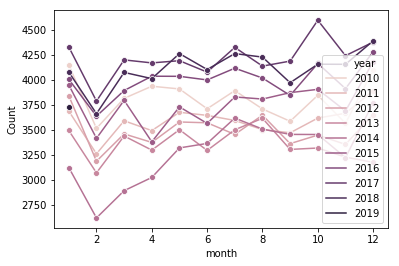

In [7]:
# x is month
# y is count
# hue is year
g = sns.lineplot(x='month', y='Count', hue='year',data=Cov,legend="full", marker='o')

### Cleaning up plot

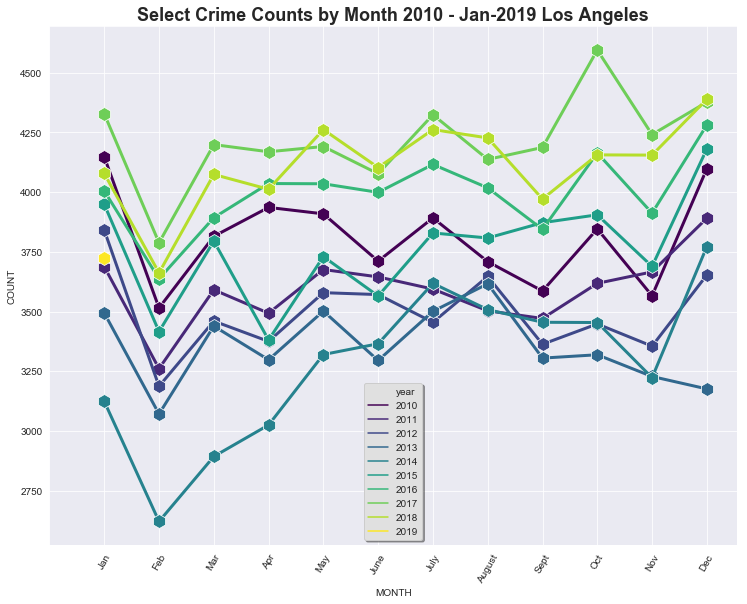

In [8]:
palette = sns.color_palette("mako_r", 6)
# plot
sns.set_style("darkgrid")
#sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
#sns.set(font_scale=2)
fig.set_size_inches(11.7, 8.27)


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g = sns.lineplot(x='month', y='Count', hue='year',data=Cov,legend="full",markersize=14, marker="h",linewidth=3, palette= 'viridis')
plt.xticks(rotation=60)
# N is count of x values
N = 13
# the x locations for the groups
ind = np.arange(N) 
# Set x tick labels
plt.xticks(ind, ('','Jan','Feb','Mar','Apr','May','June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec'))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.title('Select Crime Counts by Month 2010 - Jan-2019 Los Angeles',y=1.18,fontsize=18,weight=800)
plt.ylabel('COUNT')
plt.xlabel('MONTH')
lgnd=plt.legend(loc=8, labelspacing=0.5,shadow=True,frameon=True)
frame = lgnd.get_frame()
frame.set_facecolor('#e0e0e0')

fname='Resources/crime_select.png'
# output file
plt.savefig(fname,bbox_inches="tight",dpi=300)



# Set as Plotly Plot
## Must provide user name and password

In [11]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api
# Cufflinks binds plotly to pandas dataframes in IPython notebook. Read more
import plotly.plotly as py
import plotly.tools as tls
import numpy as np
import cufflinks as cf

plotly.tools.set_credentials_file(username=username, api_key=api_key)
fig = ax.get_figure()

plotly_fig = tls.mpl_to_plotly( fig )
#plot_url = py.plot(plotly_fig, filename='crimeline 2010-2018')

py.iplot(plotly_fig, filename='mpl-linestyles-police')

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username=username, api_key=api_key)
df = pd.read_csv("Resources/crime_output.csv")
df = pd.DataFrame(df)
# Create random data with numpy
import numpy as np
# Create traces
trace0= go.Scatter(
    x =df['YearMonth'],
    y = df['Count'],
    mode = 'markers',
    name = 'markers',
    
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )

)

data = [trace0]
layout = go.Layout(
        title='Select Crime by Area<br> Normalized per Square Mile, 2010 - 2018 Los Angeles',
        xaxis=dict(
            title='Area Name',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Count (per square mile)',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig)


'file://C:\\Users\\N5875\\GIS\\talks\\pondering-police-data-master\\01-la-seriouscrime-totals\\temp-plot.html'